In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **EDA_TRAINING DATASET**

In [ ]:
#upload train dataset
train=pd.read_csv("/content/train.csv")

In [ ]:
train.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [ ]:
train.isnull().sum()/len(train)

id         0.0
gravity    0.0
ph         0.0
osmo       0.0
cond       0.0
urea       0.0
calc       0.0
target     0.0
dtype: float64

# **VISUALIZATION**

<Axes: >

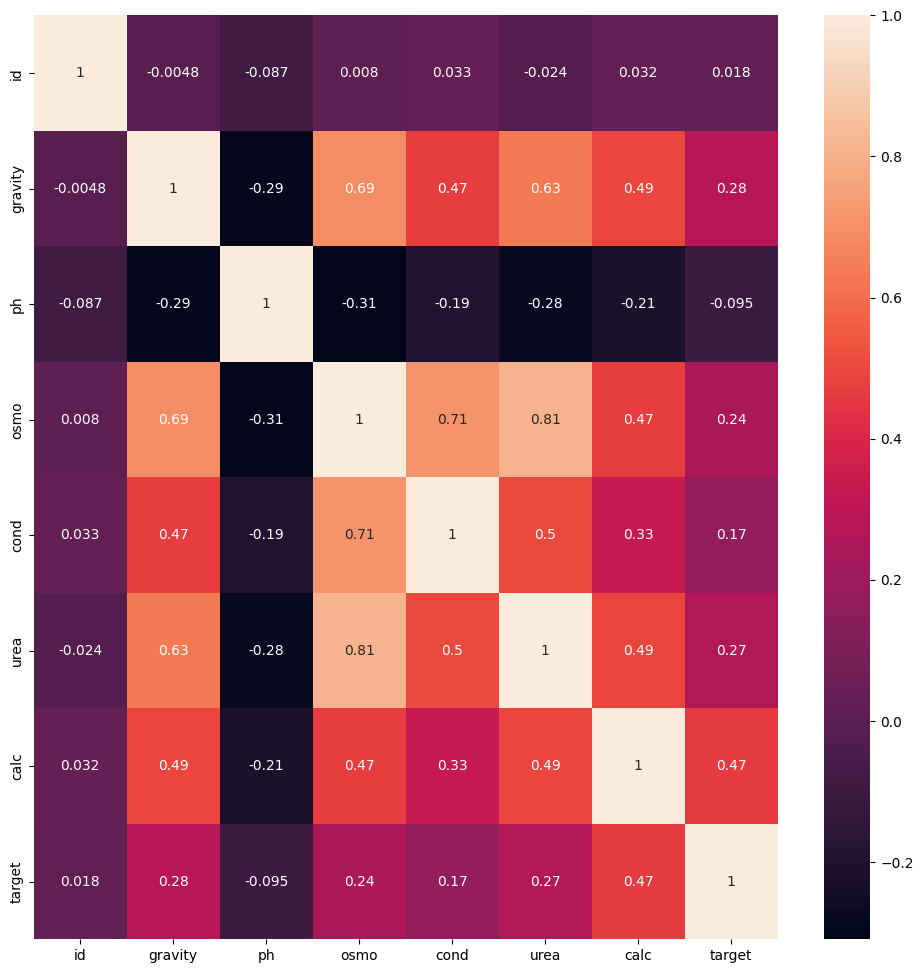

In [ ]:
#heatmap
plt.figure(figsize=(12,12))
sns.heatmap(train.corr(),annot=True)

<Axes: xlabel='target', ylabel='count'>

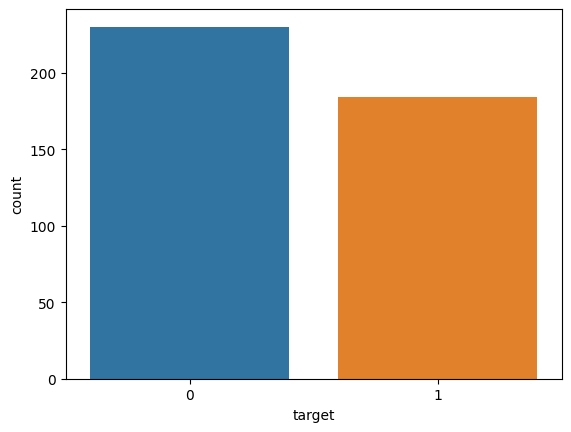

In [ ]:
#countplot for traget
sns.countplot(x=train['target'])

<Axes: xlabel='target', ylabel='ph'>

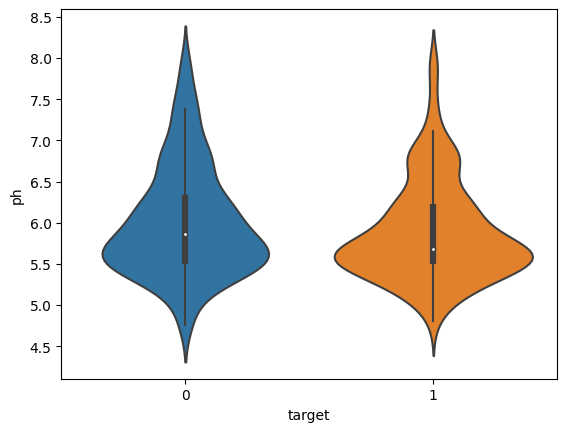

In [ ]:
#pH value across people with and without kidney-stone
sns.violinplot(x=train['target'],y=train['ph'])

<Axes: xlabel='ph', ylabel='urea'>

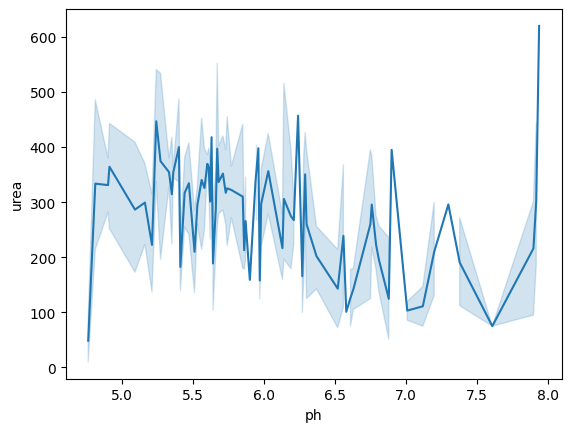

In [ ]:
#lineplot to show relation between pH and Urea
sns.lineplot(x=train['ph'],y=train['urea'])

<Axes: xlabel='gravity', ylabel='calc'>

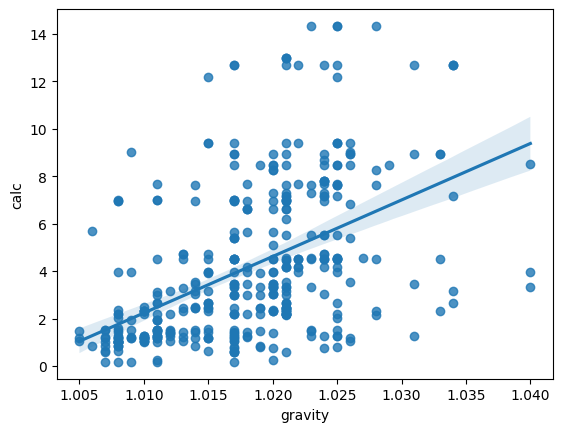

In [ ]:
#regression-plot 
sns.regplot(x=train['gravity'],y=train['calc'])

<Axes: xlabel='osmo', ylabel='cond'>

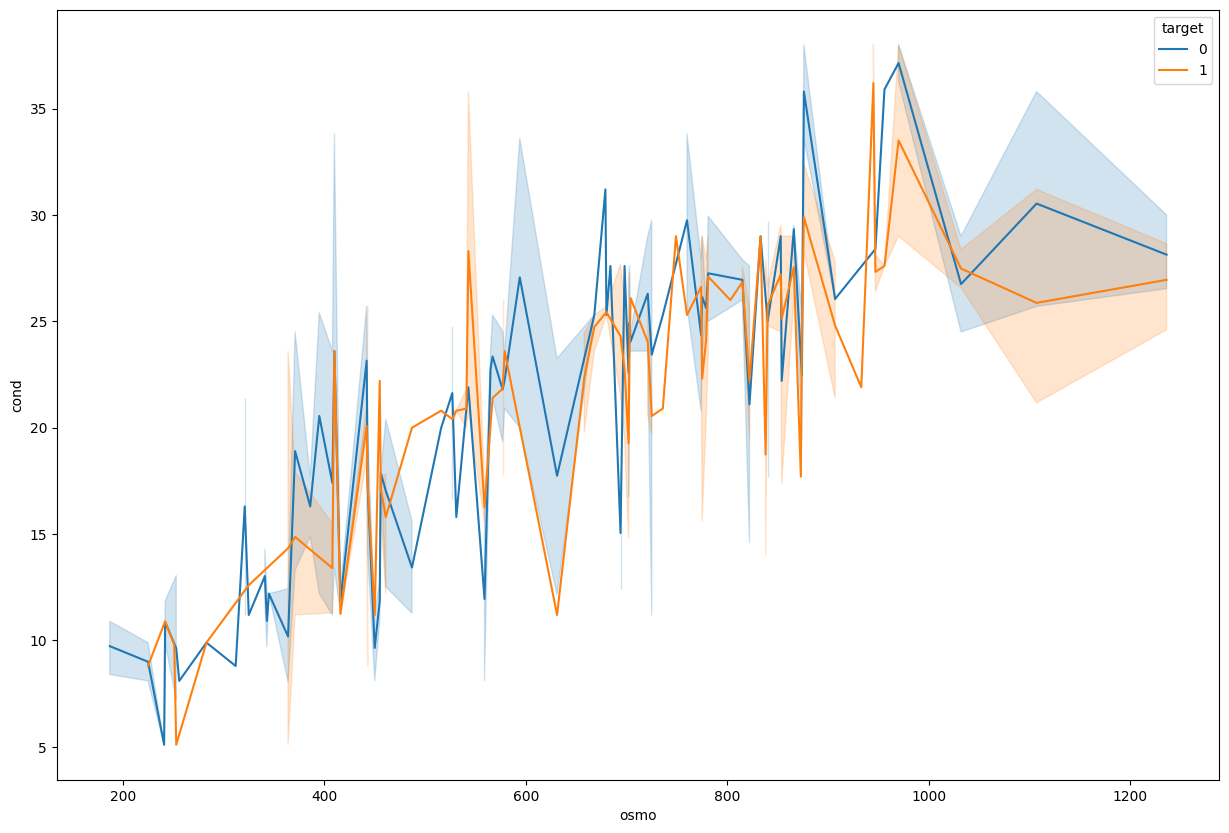

In [ ]:
plt.figure(figsize=(15,10))
sns.lineplot(x=train['osmo'],y=train['cond'],hue=train['target'])

# **TEST_DATASET**

In [ ]:
#uploading test dataset
test=pd.read_csv('/content/test.csv')

In [ ]:
test.head()

,id,gravity,ph,osmo,cond,urea,calc
0,414,1.017,5.24,345,11.5,152,1.16
1,415,1.020,5.68,874,29.0,385,3.46
2,416,1.024,5.36,698,19.5,354,13.00
3,417,1.020,5.33,668,25.3,252,3.46
4,418,1.011,5.87,567,29.0,457,2.36


In [ ]:
test.isnull().sum()/len(test)

id         0.0
gravity    0.0
ph         0.0
osmo       0.0
cond       0.0
urea       0.0
calc       0.0
dtype: float64

# **TRIAN_TEST_SPLIT**

In [ ]:
#splitting the Train Dataset 
from sklearn.model_selection import train_test_split as tts


In [ ]:
X=train.drop(['id','target'],axis=1)

In [ ]:
#independent variable 
X

,gravity,ph,osmo,cond,urea,calc
0,1.013,6.19,443,14.8,124,1.45
1,1.025,5.40,703,23.6,394,4.18
2,1.009,6.13,371,24.5,159,9.04
3,1.021,4.91,442,20.8,398,6.63
4,1.021,5.53,874,17.8,385,2.21
...,...,...,...,...,...,...
409,1.011,5.21,527,21.4,75,1.53
410,1.024,5.53,577,19.7,224,0.77
411,1.018,6.28,455,22.2,270,7.68
412,1.008,7.12,325,12.6,75,1.03


In [ ]:
#dependent variable
Y=train['target']

In [ ]:
Y

0      0
1      0
2      0
3      1
4      1
      ..
409    0
410    0
411    1
412    1
413    0
Name: target, Length: 414, dtype: int64

In [ ]:
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.30,random_state=2)

In [ ]:
X_train.shape

(289, 6)

In [ ]:
Y_train.shape

(289,)

In [ ]:
Y_test.shape

(125,)

In [ ]:
X_test.shape

(125, 6)

# **IMPORTING_LIBRARYS**


In [ ]:
#importing diffrent librarys for better understanding of model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# **LOGISTIC MODEL**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
pred_train=lr.predict(X_train)

In [ ]:
accuracy_score(pred_train,Y_train)

0.7439446366782007

In [ ]:
pred_test=lr.predict(X_test)

In [ ]:
accuracy_score(pred_test,Y_test)

0.672

In [ ]:
print(classification_report(pred_test,Y_test))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71        79
           1       0.54      0.74      0.62        46

    accuracy                           0.67       125
   macro avg       0.67      0.69      0.67       125
weighted avg       0.71      0.67      0.68       125



In [ ]:
confusion_matrix(pred_test,Y_test)

array([[50, 29],
       [12, 34]])

# **RANDOM_FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=400,max_samples=8,min_samples_split=2)

In [ ]:
rf.fit(X_train,Y_train)

RandomForestClassifier(max_samples=8, n_estimators=400)

In [ ]:
pred_rf=rf.predict(X_train)

In [ ]:
accuracy_score(Y_train,pred_rf)

0.740484429065744

In [ ]:
pred_rft=rf.predict(X_test)

In [ ]:
accuracy_score(Y_test,pred_rft)

0.744

In [ ]:
print(classification_report(Y_test,pred_rft))

              precision    recall  f1-score   support

           0       0.70      0.84      0.76        62
           1       0.80      0.65      0.72        63

    accuracy                           0.74       125
   macro avg       0.75      0.74      0.74       125
weighted avg       0.75      0.74      0.74       125



In [ ]:
confusion_matrix(Y_test,pred_rft)

array([[52, 10],
       [22, 41]])

# **XGBOOST-CLASSIFIER**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xg=XGBClassifier()

In [ ]:
xg.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
pred_xg=xg.predict(X_train)

In [ ]:
accuracy_score(Y_train,pred_xg)

1.0

In [ ]:
pred_testxg=xg.predict(X_test)

In [ ]:
accuracy_score(Y_test,pred_testxg)

0.656

In [ ]:
print(classification_report(Y_test,pred_testxg))

              precision    recall  f1-score   support

           0       0.64      0.71      0.67        62
           1       0.68      0.60      0.64        63

    accuracy                           0.66       125
   macro avg       0.66      0.66      0.66       125
weighted avg       0.66      0.66      0.66       125



In [ ]:
confusion_matrix(Y_test,pred_testxg)

array([[44, 18],
       [25, 38]])

# **FINAL_SUBMISSION**

In [ ]:
# Test data prediction
result=rf.predict(test.drop(['id'],axis=1))

In [ ]:

final=pd.DataFrame({'id':test['id'],'target':result})

In [ ]:
# converting dataframe to csv file
final.to_csv("rf_7.csv",index=False)